### Results from FUTURES Simulations  

This Notebook discusses results from FUTURE simulations with and without zoning parameters included in the POTENTIAL submodel.

In [1]:
import pickle
import matplotlib.pyplot as plt
from helper_results import results_table, plot_hit_miss, plot_quant_alloc_error

Open results exported from futures_pga.ipynb

In [5]:
with open("results//metrics_sub", "rb") as pf:
  metrics_sub = pickle.load(pf)
with open("results//metrics", "rb") as pf:
  metrics_core = pickle.load(pf)
with open("results//metrics_base", "rb") as pf:
  metrics_base = pickle.load(pf)

Create results table from metrics dictionary

In [6]:
metrics_base_tab = results_table(metrics_base)
metrics_core_tab = results_table(metrics_core)
metrics_sub_tab = results_table(metrics_sub)

Calculate mean figure of merit across all stochastic runs

In [7]:
metrics_base_tab["figure_of_merit"].mean()

2.5802597593338987

In [4]:
metrics_sub_tab["figure_of_merit"].mean()

2.550810140432645

In [76]:
def plot_ax(ax, tab, cmap):
    ax.set_prop_cycle(color=cmap.colors)
    ax.bar([""], tab["misses"].mean(), width, label="Misses")
    ax.bar(
        [""],
        tab["false_alarms"].mean(),
        width,
        bottom=tab["misses"].mean(),
        label="false alarms",
    )
    ax.bar(
        [""],
        tab["hits"].mean(),
        width,
        bottom=tab["misses"].mean() + tab["false_alarms"].mean(),
        label="Hits",
    )
    ax.bar(
        [""],
        tab["null_successes"].mean(),
        width,
        bottom=tab["misses"].mean() + tab["false_alarms"].mean() + tab["hits"].mean(),
        label="Null successes",
    )
    ax.bar(
        [""],
        tab["initially_developed"].mean(),
        width,
        bottom=tab["misses"].mean()
        + tab["false_alarms"].mean()
        + tab["hits"].mean()
        + tab["null_successes"].mean(),
        label="Initially_developed",
    )
    ax.text(-0.03, 1, f'{tab["misses"].mean():.2f}%', color="black")
    ax.text(-0.03, 4.2, f'{tab["false_alarms"].mean():.2f}%', color="black")
    ax.text(0.03, 5.3, f'{tab["hits"].mean():.2f}%', color="black")
    ax.text(-0.03, 45, f'{tab["null_successes"].mean():.2f}%', color="black")
    ax.text(-0.03, 90, f'{tab["initially_developed"].mean():.2f}%', color="black")
    return(ax)

C:\Users\malawrim\AppData\Local\Temp\ipykernel_17336\947283685.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("Set3", 5)


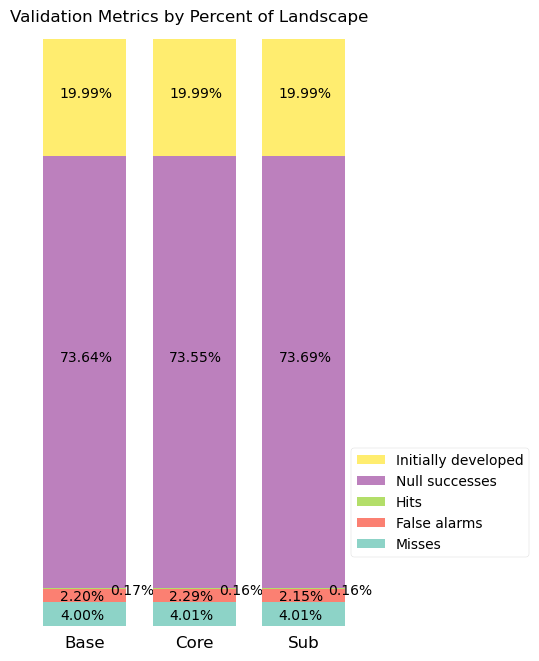

In [121]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# plt.style.use("seaborn-v0_8-pastel")
cmap = plt.cm.get_cmap("Set3", 5)
fig.suptitle('Validation Metrics by Percent of Landscape', y=0.88)
fig.set_size_inches(4, 8)
tab = metrics_sub_tab
ax1 = plot_ax(ax1, metrics_base_tab, cmap)
ax1.set_title('Base', loc='center', y = -0.05)
ax1.axis("off")
ax2 = plot_ax(ax2, metrics_core_tab, cmap)
ax2.set_title('Core', loc='center', y = -0.05)
ax2.axis("off")
ax3 = plot_ax(ax3, metrics_sub_tab, cmap)
ax3.set_title('Sub', loc='center', y = -0.05)
ax3.axis("off")
# ax3.tick_params(axis='y', which='both', bottom=False)
width = 0.1  # the width of the bars: can also be len(x) sequence

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.GnBu)

handles, labels = ax1.get_legend_handles_labels()
labels = ["Initially developed", "Null successes", "Hits", "False alarms", "Misses"]
plt.legend(handles[::-1], labels, loc='center right', bbox_to_anchor=(3.05, 0.2))
# plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [ ]:
#TODO fix

In [ ]:
def plot_quant()
fig, ax = plt.subplots()
fig.set_size_inches(1, 6)
cmap = plt.cm.get_cmap("viridis", 3)
ax.set_prop_cycle(color=cmap.colors)
ax.bar([""], tab["quantity_error"].mean(), width, label="Quantity error")
ax.bar(
    [""],
    tab["allocation_error"].mean(),
    width,
    bottom=tab["quantity_error"].mean(),
    label="Allocation error",
)
ax.bar(
    [""], tab["hits"].mean(), width, bottom=tab["total_error"].mean(), label="Hits"
)
ax.text(-0.02, 0.5, f'{tab["quantity_error"].mean():.2f}%', color="black")
ax.text(-0.02, 2.7, f'{tab["allocation_error"].mean():.2f}%', color="black")
ax.text(-0.02, 6.4, f'{tab["hits"].mean():.2f}%', color="black")
plt.ylabel("Percent of landscape")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\4128907165.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


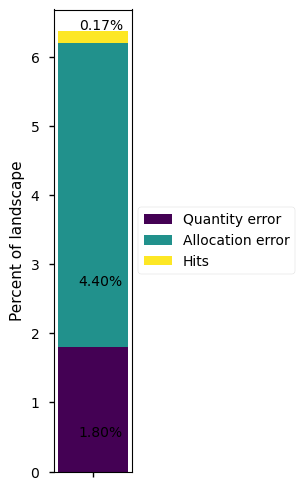

In [133]:
plot_quant_alloc_error(metrics_base_tab)

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\4128907165.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


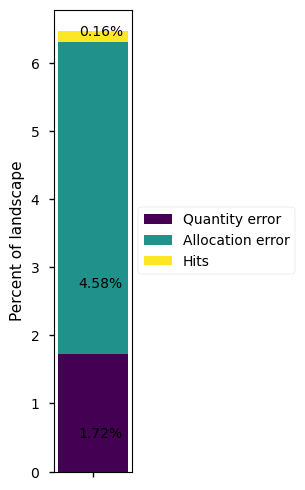

In [134]:
plot_quant_alloc_error(metrics_core_tab)

C:\Users\malawrim\AppData\Local\Temp\ipykernel_21540\4128907165.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


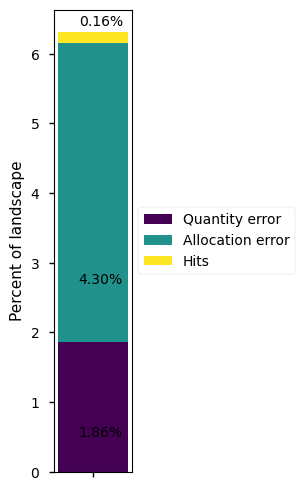

In [135]:
plot_quant_alloc_error(metrics_sub_tab)